In [827]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [828]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from scipy.stats import probplot

pd.set_option('display.max_columns', 200)

In [829]:
applData = pd.read_csv("train.csv", encoding= 'unicode_escape')

In [830]:
applData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [831]:
print(applData.shape)
print(applData.info())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st     

# Data Cleaning

### Find the columns for which more than 45% the values are missing, they will not be able to explain the housing prices correctly 

In [832]:
pctDF = (applData.isnull().sum()/len(applData) * 100).reset_index()
pctDF.columns = ['Columns','Missing Value Percentage']
pctDF = pctDF[pctDF['Missing Value Percentage'] > 45]
pctDF

,Columns,Missing Value Percentage
6,Alley,93.767123
57,FireplaceQu,47.260274
72,PoolQC,99.520548
73,Fence,80.753425
74,MiscFeature,96.301370


In [833]:
columns = list(map(lambda x: x, pctDF['Columns']))
applData.drop(columns = columns, inplace=True)
applData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### Drop the Id column as it is not significant in explaining the House Price

In [834]:
#Remove the id Columns
applData.drop(columns = ['Id'], inplace=True)

## Check Skewness in the data
- Drop highly skewed categorical variables where one value has more than 75% share of the values
- These kind of variables are not ideal in building the model and will not be able to explain the house prices because anyways these feautre will be removed during Recursive feature elimination

In [835]:
from scipy.special import boxcox1p

transformedColumns = []
droppedColumns = []
for i in enumerate(applData.columns):
    column = i[1]
    valueDF = ((applData[column].value_counts() / len(applData[column]))*100).reset_index()
    valueDF.columns = ['column','Value Percentage']
    skewDF = valueDF[valueDF['Value Percentage'] >= 75]
    if(len(skewDF) > 0):
        applData.drop(columns = [column], inplace=True)
        droppedColumns.append(column)
            
print("Dropped Highly skewed columns:", droppedColumns)

Dropped Highly skewed columns: ['MSZoning', 'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType', 'SaleCondition']


In [836]:
applData.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,2,2008,208500
1,20,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,5,2007,181500
2,60,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,9,2008,223500
3,70,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,2,2006,140000
4,60,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,12,2008,250000


In [837]:
# 44 Features are remaining after removing the highly skewed columns.
applData.shape

(1460, 44)

## Imputing the Missing values
- Find the features for which we have some missing values
- Impute the Numerical column values with either mean or median

In [838]:
pctDF = (applData.isnull().sum()/len(applData) * 100).reset_index()
pctDF.columns = ['Columns','Missing Value Percentage']
pctDF = pctDF[pctDF['Missing Value Percentage'] > 0]
pctDF

,Columns,Missing Value Percentage
1,LotFrontage,17.739726
13,MasVnrType,0.547945
14,MasVnrArea,0.547945
17,BsmtQual,2.534247
18,BsmtExposure,2.602740
19,BsmtFinType1,2.534247
34,GarageType,5.547945
35,GarageYrBlt,5.547945
36,GarageFinish,5.547945


In [839]:
print(applData['LotFrontage'].value_counts())
print("Median: ", applData["LotFrontage"].median())
print("Mean: ", applData["LotFrontage"].mean())

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64
Median:  69.0
Mean:  70.04995836802665


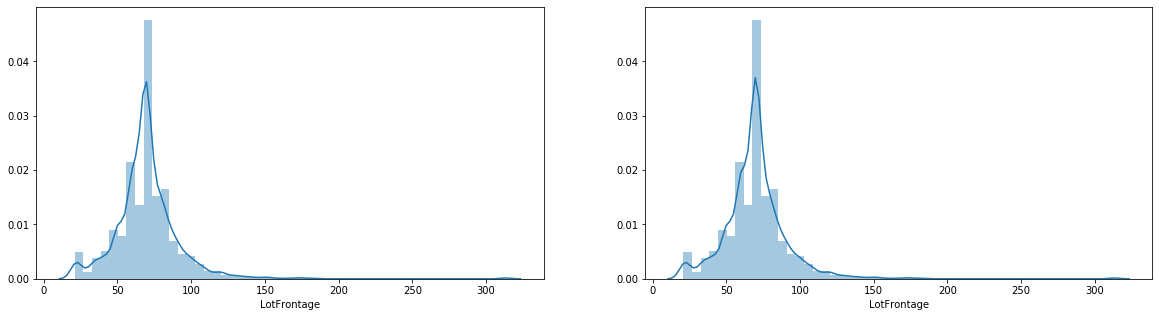

In [840]:
plt.figure(figsize  = (20, 5))
plt.subplot(1, 2, 1)
sns.distplot(applData['LotFrontage'].fillna(applData["LotFrontage"].median()))
plt.subplot(1, 2, 2)
sns.distplot(applData['LotFrontage'].fillna(applData["LotFrontage"].mean()))

### Not much difference in imputing with Median on Mean
- Lets go with median to avoid float values

In [841]:
print("Missing Values Before: ", applData['LotFrontage'].isnull().sum())
applData['LotFrontage'].fillna(applData["LotFrontage"].median(), inplace=True)
print("Missing Values After: ", applData['LotFrontage'].isnull().sum())

Missing Values Before:  259
Missing Values After:  0


### MasVnrType is categorical variable
#### Replace null values with Mode or "None" value, both of them are None

In [842]:
print(applData['MasVnrType'].value_counts())
print("Mode: ", applData["MasVnrType"].mode())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
Mode:  0    None
dtype: object


In [843]:
print("Missing Values Before: ", applData['MasVnrType'].isnull().sum())
applData['MasVnrType'].fillna('None', inplace=True)
print("Missing Values After: ", applData['MasVnrType'].isnull().sum())

Missing Values Before:  8
Missing Values After:  0


### MasVnrArea is numerical variable
#### Replace null values with 0 because MasVnrType is None for these rows, so its meaningful missing.

In [844]:
print(applData['MasVnrArea'].value_counts())

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64


In [845]:
print("Missing Values Before: ", applData['MasVnrArea'].isnull().sum())
applData['MasVnrArea'].fillna(0, inplace=True)
print("Missing Values After: ", applData['MasVnrArea'].isnull().sum())

Missing Values Before:  8
Missing Values After:  0


### BsmtQual, BsmtExposure, BsmtFinType1 are Categorical Variables
#### Missing values are "meaningful" missing so replace n/a with NA (No Basement)

In [846]:
print(applData['BsmtQual'].value_counts())

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


In [847]:
print("Missing Values Before: ", applData['BsmtQual'].isnull().sum())
applData['BsmtQual'].fillna('NA', inplace=True)
print("Missing Values After: ", applData['BsmtQual'].isnull().sum())

#For BsmtExposure and BsmtFinType1 apply the same rule as BsmtQual
applData['BsmtExposure'].fillna('NA', inplace=True)
applData['BsmtFinType1'].fillna('NA', inplace=True)

Missing Values Before:  37
Missing Values After:  0


### GarageType, GarageFinish are Categorical Variable
#### Missing values are "meaningful" missing so replace n/a with NA (No Basement)

In [848]:
print(applData['GarageType'].value_counts())

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


In [849]:
print("Missing Values Before: ", applData['GarageType'].isnull().sum())
applData['GarageType'].fillna('NA', inplace=True)
applData['GarageFinish'].fillna('NA', inplace=True)
print("Missing Values After: ", applData['GarageType'].isnull().sum())

Missing Values Before:  81
Missing Values After:  0


### GarageYrBlt is Numerical Variable
#### Missing values are "meaningful" missing, lets impute the value as future date (2021)
#### Later we can create age of the Garage and bin them. For -ve values we can create "NA" bin later

In [850]:
print(applData['GarageYrBlt'].value_counts())

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64


In [851]:
import datetime

today = datetime.datetime.now()
print("Missing Values Before: ", applData['GarageYrBlt'].isnull().sum())
applData['GarageYrBlt'].fillna(today.year+1, inplace=True) #Set to future date
print("Missing Values After: ", applData['GarageYrBlt'].isnull().sum())

Missing Values Before:  81
Missing Values After:  0


## Check for missing values again
- No missing values found

In [852]:
pctDF = (applData.isnull().sum()/len(applData) * 100).reset_index()
pctDF.columns = ['Columns','Missing Value Percentage']
pctDF = pctDF[pctDF['Missing Value Percentage'] > 0]
pctDF

,Columns,Missing Value Percentage


In [853]:
applData.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,2,2008,208500
1,20,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,5,2007,181500
2,60,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,9,2008,223500
3,70,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,2,2006,140000
4,60,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,12,2008,250000


## Finding Outliers
### check for only continuous variables

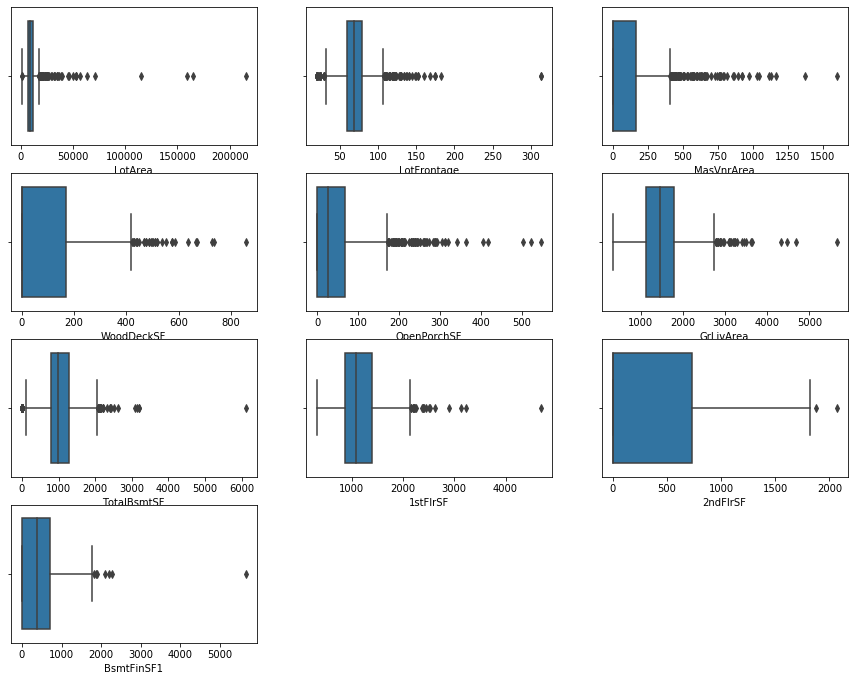

In [854]:
columns = ['LotArea','LotFrontage','MasVnrArea','WoodDeckSF','OpenPorchSF','GrLivArea','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1']

plt.figure(figsize  = (15,30))
for i in enumerate(columns):
    plt.subplot(10, 3, i[0]+1)
    sns.boxplot(data=applData, x=i[1])

## Treating the outliers
- There are two ways to treat the outliers
    - Delete those rows
    - Impute the values based on inter quartile range (IQR)
- I will use soft outlier treatment to avoid any information loss.

In [855]:
def treatOutliers(col, df):
    q4 = df[col].quantile(0.99)
    df[col][df[col] >=  q4] = q4
    
    q1 = df[col].quantile(0.01)
    df[col][df[col] <=  q1] = q1
    
    return df

In [856]:
columns = ['LotArea','LotFrontage','MasVnrArea','WoodDeckSF','OpenPorchSF','GrLivArea','TotalBsmtSF', 'BsmtFinSF1', '1stFlrSF']
for col in columns:
    applData = treatOutliers(col, applData)

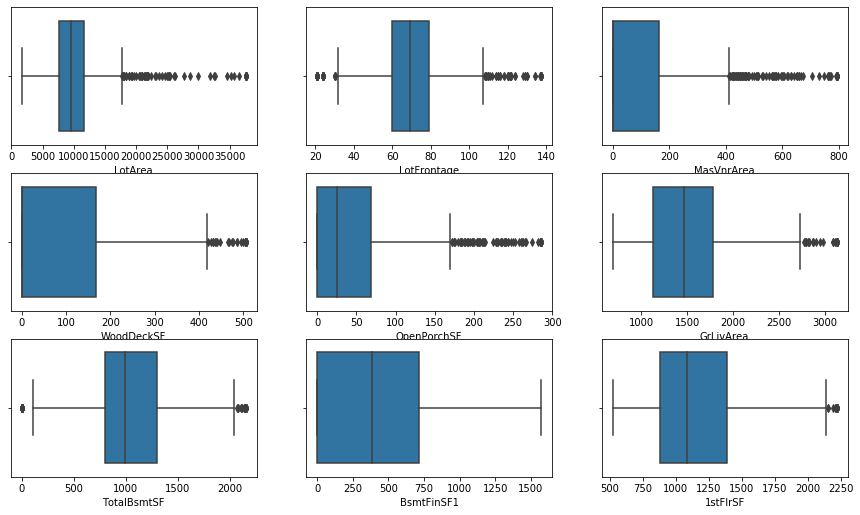

In [857]:
plt.figure(figsize  = (15,30))
for i in enumerate(columns):
    plt.subplot(10, 3, i[0]+1)
    sns.boxplot(data=applData, x=i[1])

# Exploratory Data Analysis

## Univariate Analysis

### Check the distribution of data for numerical columns

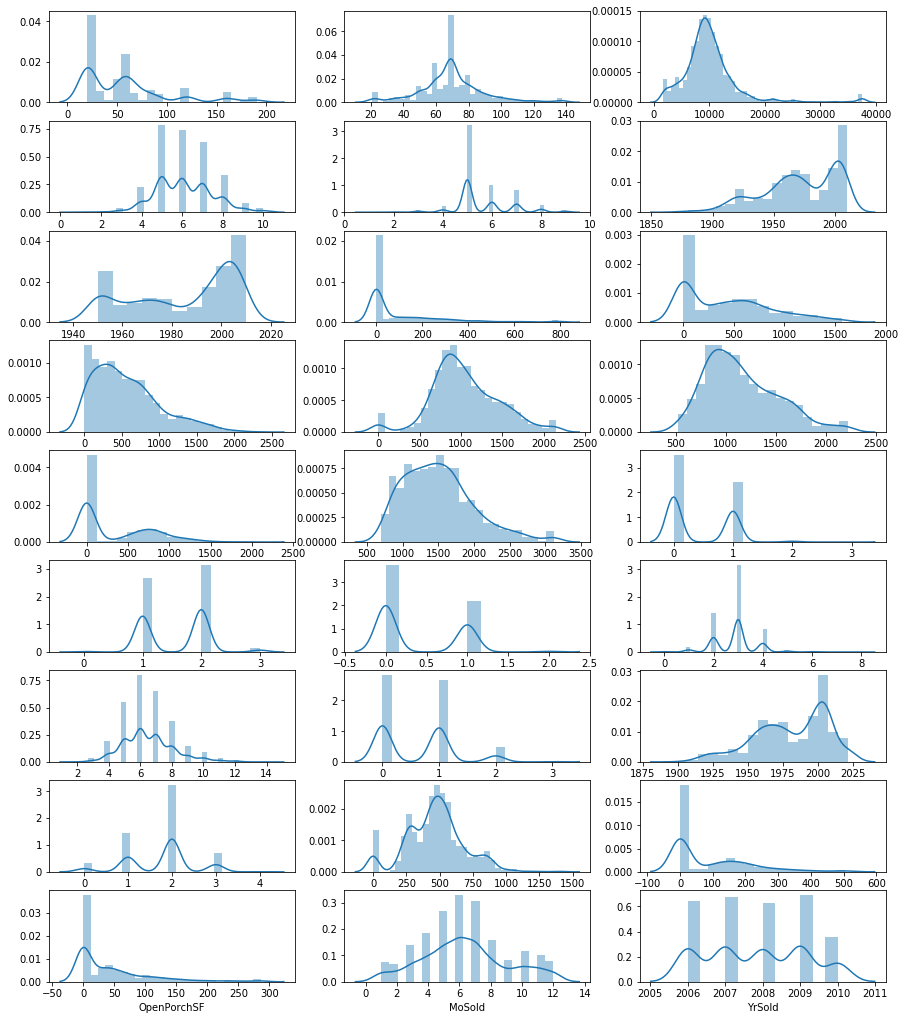

In [858]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numdf = applData.select_dtypes(include=numerics)

plt.figure(figsize  = (15,30))
for i in enumerate(numdf.columns.drop('SalePrice')):
    plt.subplot(15, 3, i[0]+1)
    sns.distplot(applData[i[1]])

In [859]:
applData.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,65.0,8450.0,Reg,Inside,CollgCr,2Story,7,5,2003,2003,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706.0,150,856.0,Ex,856.0,854,1710.0,1,2,1,3,Gd,8,0,Attchd,2003.0,RFn,2,548,0.0,61.0,2,2008,208500
1,20,80.0,9600.0,Reg,FR2,Veenker,1Story,6,8,1976,1976,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978.0,284,1262.0,Ex,1262.0,0,1262.0,0,2,0,3,TA,6,1,Attchd,1976.0,RFn,2,460,298.0,0.0,5,2007,181500
2,60,68.0,11250.0,IR1,Inside,CollgCr,2Story,7,5,2001,2002,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486.0,434,920.0,Ex,920.0,866,1786.0,1,2,1,3,Gd,6,1,Attchd,2001.0,RFn,2,608,0.0,42.0,9,2008,223500
3,70,60.0,9550.0,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216.0,540,756.0,Gd,961.0,756,1717.0,1,1,0,3,Gd,7,1,Detchd,1998.0,Unf,3,642,0.0,35.0,2,2006,140000
4,60,84.0,14260.0,IR1,FR2,NoRidge,2Story,8,5,2000,2000,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655.0,490,1145.0,Ex,1145.0,1053,2198.0,1,2,1,4,Gd,9,1,Attchd,2000.0,RFn,3,836,192.0,84.0,12,2008,250000


## Bivariate Analysis
### Generate the Pairplot for Some of the variable to understand the linear relationship
- The plot 'SalePrice' vs 'YearBuilt' shows how Yearbuilt can explain the house prices. In the left bottom corner, the scatter plot 'dots cloud' can tell us that Sale prices are rising exponentially as the YearBuilt comes closer to present

- Intereshing to see 'TotalBsmtSF' vs 'GrLiveArea'. This plot tell that the dots drawing a linear line, which almost looks like a border and most of the dots are below that line. This tells that Basement areas is equal to the ground living area, but it is not expected a basement area bigger than the above ground living area unless you are building a GIZAs pyramid 

- The plot 'TotalBsmntSF' vs 'SalesPrices' can also explain the house prices, that Sale prices are rising linearly as Basement Area is increasing

<Figure size 1080x2160 with 0 Axes>

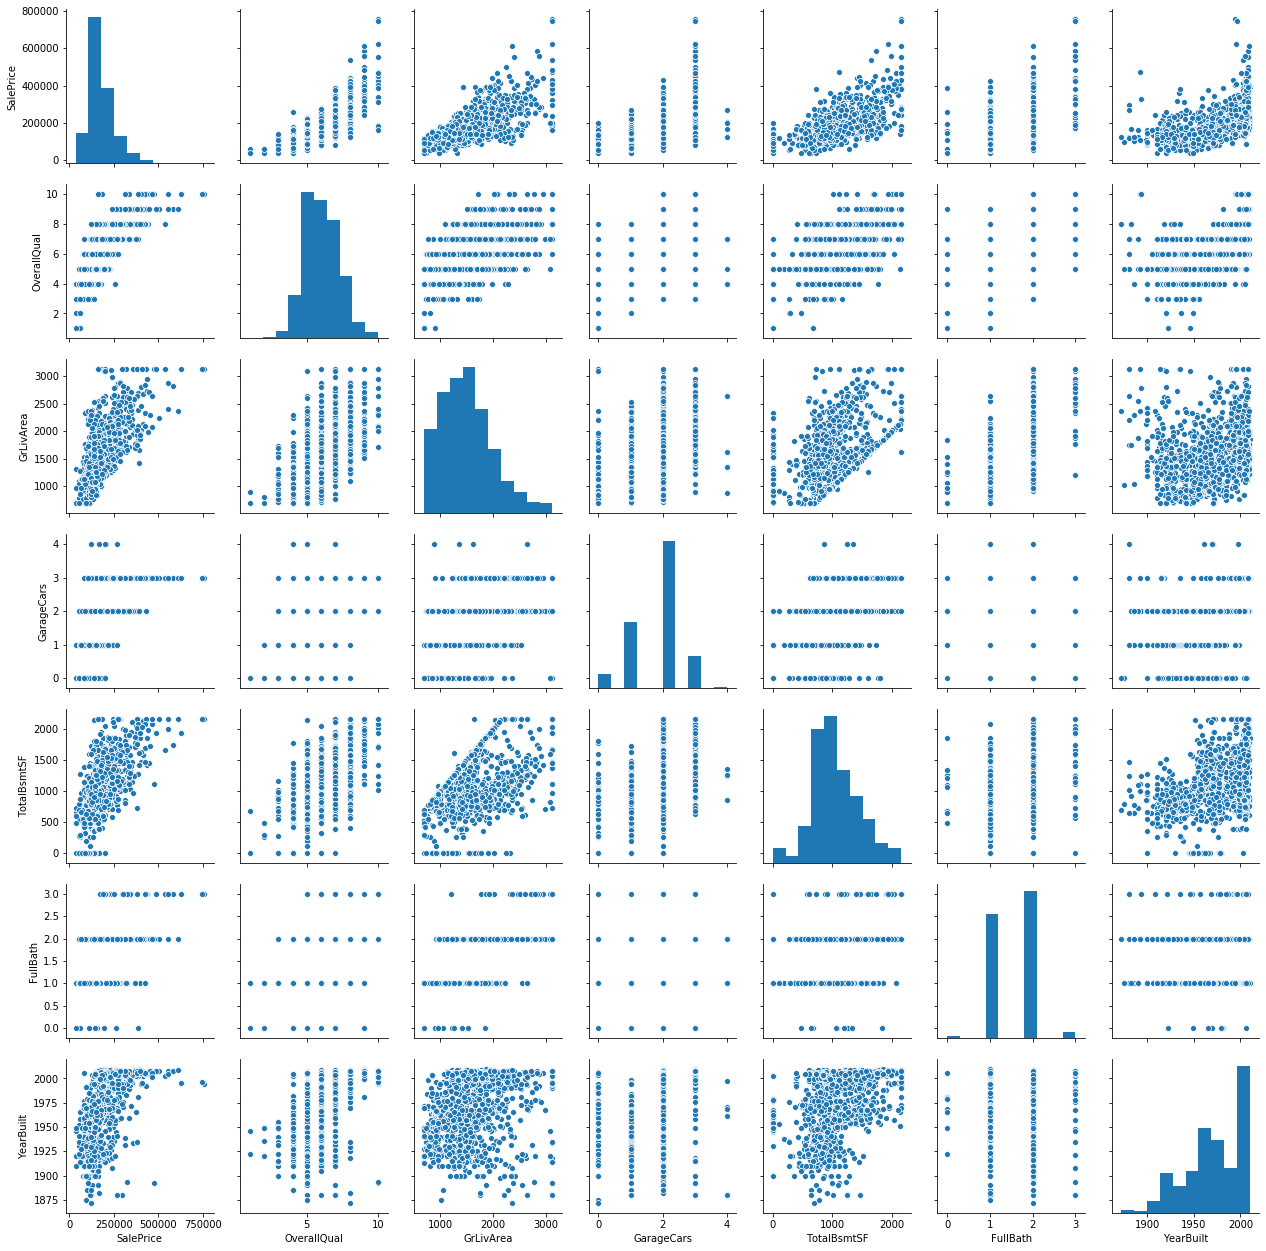

In [860]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
plt.figure(figsize  = (15,30))
sns.pairplot(applData[cols], size = 2.5)
plt.show();

##  Check the distribution of data for all the columns in comparion to Target Variable SalePrice

#### Few Important observation using this Scatter plot
- As the Living Area grade is increasing SalePrice is also increasing
- As the 

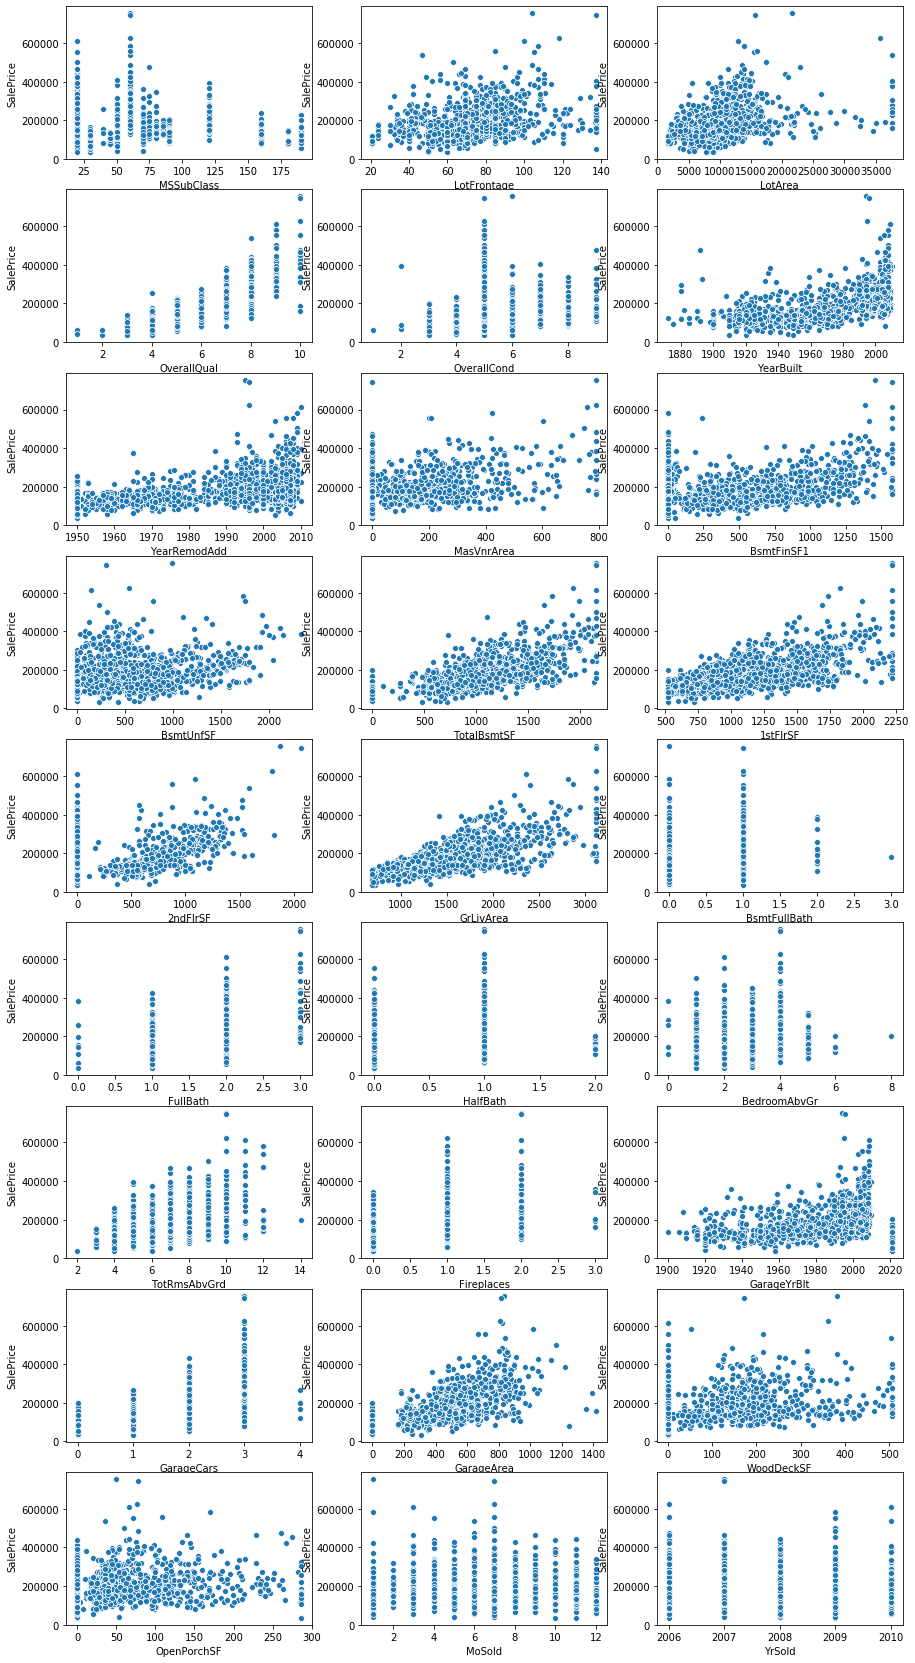

In [861]:
plt.figure(figsize  = (15,50))
for i in enumerate(numdf.columns.drop('SalePrice')):
    plt.subplot(15, 3, i[0]+1)
    sns.scatterplot(x = applData[i[1]], y = applData['SalePrice'])


# Check Target Variable distribution

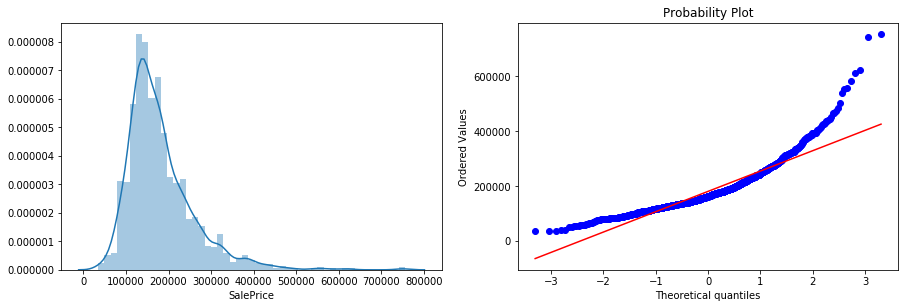

In [862]:
plt.figure(figsize  = (15, 10))
plt.subplot(2, 2, 1)
sns.distplot(applData['SalePrice'])
plt.subplot(2, 2, 2)
res = probplot(applData['SalePrice'], plot=plt)

## Check the distribution of Log transformation on target variable and normally distribute the data.

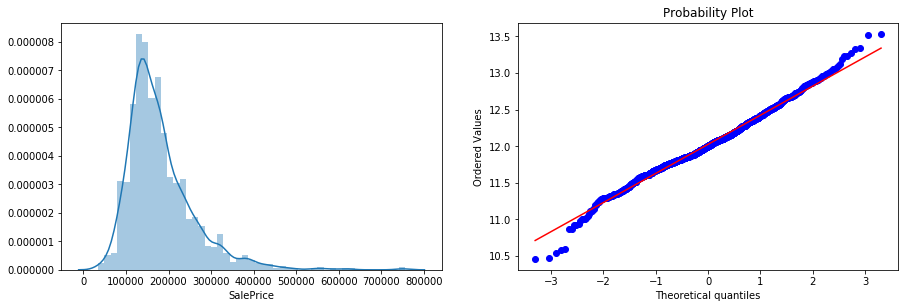

In [863]:
plt.figure(figsize  = (15, 10))
plt.subplot(2, 2, 1)
sns.distplot(applData['SalePrice'])
plt.subplot(2, 2, 2)
res = probplot(np.log(applData['SalePrice']), plot=plt)

# Data Preparation

## Reducing the number of categories for categorical variables
#### Find out the columns which have low percentage for some values and merge them to create new category called 'Others'
#### This we will do only for those columns which have lot of categories, not required to do for all the categorical columns

In [864]:
def makeValuesAsOther(col, percent):
    print('Before')
    print(applData[col].value_counts()/len(applData)*100)
    
    values = (applData[col].value_counts()/len(applData)*100).reset_index()
    values = values[values[col] < percent]["index"]

    for i in values:
        applData[col].replace(i, 'Other', inplace=True)
        
    print('After')
    print(applData[col].value_counts()/len(applData)*100)    

In [865]:
makeValuesAsOther("Neighborhood", 2)

Before
NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
ClearCr     1.917808
SWISU       1.712329
StoneBr     1.712329
Blmngtn     1.164384
MeadowV     1.164384
BrDale      1.095890
Veenker     0.753425
NPkVill     0.616438
Blueste     0.136986
Name: Neighborhood, dtype: float64
After
NAmes      15.410959
Other      10.273973
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
Name: Neighborhood, dtype: float64


In [866]:
makeValuesAsOther("HouseStyle", 10)

Before
1Story    49.726027
2Story    30.479452
1.5Fin    10.547945
SLvl       4.452055
SFoyer     2.534247
1.5Unf     0.958904
2.5Unf     0.753425
2.5Fin     0.547945
Name: HouseStyle, dtype: float64
After
1Story    49.726027
2Story    30.479452
1.5Fin    10.547945
Other      9.246575
Name: HouseStyle, dtype: float64


In [867]:
makeValuesAsOther("Exterior1st", 6)

Before
VinylSd    35.273973
HdBoard    15.205479
MetalSd    15.068493
Wd Sdng    14.109589
Plywood     7.397260
CemntBd     4.178082
BrkFace     3.424658
WdShing     1.780822
Stucco      1.712329
AsbShng     1.369863
Stone       0.136986
BrkComm     0.136986
CBlock      0.068493
AsphShn     0.068493
ImStucc     0.068493
Name: Exterior1st, dtype: float64
After
VinylSd    35.273973
HdBoard    15.205479
MetalSd    15.068493
Wd Sdng    14.109589
Other      12.945205
Plywood     7.397260
Name: Exterior1st, dtype: float64


In [868]:
makeValuesAsOther("Exterior2nd", 6)

Before
VinylSd    34.520548
MetalSd    14.657534
HdBoard    14.178082
Wd Sdng    13.493151
Plywood     9.726027
CmentBd     4.109589
Wd Shng     2.602740
Stucco      1.780822
BrkFace     1.712329
AsbShng     1.369863
ImStucc     0.684932
Brk Cmn     0.479452
Stone       0.342466
AsphShn     0.205479
CBlock      0.068493
Other       0.068493
Name: Exterior2nd, dtype: float64
After
VinylSd    34.520548
MetalSd    14.657534
HdBoard    14.178082
Wd Sdng    13.493151
Other      13.424658
Plywood     9.726027
Name: Exterior2nd, dtype: float64


In [869]:
applData.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,65.0,8450.0,Reg,Inside,CollgCr,2Story,7,5,2003,2003,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706.0,150,856.0,Ex,856.0,854,1710.0,1,2,1,3,Gd,8,0,Attchd,2003.0,RFn,2,548,0.0,61.0,2,2008,208500
1,20,80.0,9600.0,Reg,FR2,Other,1Story,6,8,1976,1976,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978.0,284,1262.0,Ex,1262.0,0,1262.0,0,2,0,3,TA,6,1,Attchd,1976.0,RFn,2,460,298.0,0.0,5,2007,181500
2,60,68.0,11250.0,IR1,Inside,CollgCr,2Story,7,5,2001,2002,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486.0,434,920.0,Ex,920.0,866,1786.0,1,2,1,3,Gd,6,1,Attchd,2001.0,RFn,2,608,0.0,42.0,9,2008,223500
3,70,60.0,9550.0,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Wd Sdng,Other,None,0.0,TA,BrkTil,TA,No,ALQ,216.0,540,756.0,Gd,961.0,756,1717.0,1,1,0,3,Gd,7,1,Detchd,1998.0,Unf,3,642,0.0,35.0,2,2006,140000
4,60,84.0,14260.0,IR1,FR2,NoRidge,2Story,8,5,2000,2000,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655.0,490,1145.0,Ex,1145.0,1053,2198.0,1,2,1,4,Gd,9,1,Attchd,2000.0,RFn,3,836,192.0,84.0,12,2008,250000


## Calculate Age for Year related columns

In [870]:
today = datetime.datetime.now()

columns = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']

for col in columns:
    applData[col+'Age'] = today.year - applData[col]

applData.drop(columns = columns, inplace=True)

In [871]:
applData.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,YearBuiltAge,YearRemodAddAge,GarageYrBltAge,YrSoldAge
0,60,65.0,8450.0,Reg,Inside,CollgCr,2Story,7,5,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706.0,150,856.0,Ex,856.0,854,1710.0,1,2,1,3,Gd,8,0,Attchd,RFn,2,548,0.0,61.0,2,208500,17,17,17.0,12
1,20,80.0,9600.0,Reg,FR2,Other,1Story,6,8,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978.0,284,1262.0,Ex,1262.0,0,1262.0,0,2,0,3,TA,6,1,Attchd,RFn,2,460,298.0,0.0,5,181500,44,44,44.0,13
2,60,68.0,11250.0,IR1,Inside,CollgCr,2Story,7,5,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486.0,434,920.0,Ex,920.0,866,1786.0,1,2,1,3,Gd,6,1,Attchd,RFn,2,608,0.0,42.0,9,223500,19,18,19.0,12
3,70,60.0,9550.0,IR1,Corner,Crawfor,2Story,7,5,Wd Sdng,Other,None,0.0,TA,BrkTil,TA,No,ALQ,216.0,540,756.0,Gd,961.0,756,1717.0,1,1,0,3,Gd,7,1,Detchd,Unf,3,642,0.0,35.0,2,140000,105,50,22.0,14
4,60,84.0,14260.0,IR1,FR2,NoRidge,2Story,8,5,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655.0,490,1145.0,Ex,1145.0,1053,2198.0,1,2,1,4,Gd,9,1,Attchd,RFn,3,836,192.0,84.0,12,250000,20,20,20.0,12


## Converting Text categories to weight based based Categories

In [872]:
valMap1 = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
applData['ExterQual'] = applData['ExterQual'].map(valMap1)
applData['BsmtQual'] = applData['BsmtQual'].map(valMap1)
applData['HeatingQC'] = applData['HeatingQC'].map(valMap1)
applData['KitchenQual'] = applData['KitchenQual'].map(valMap1)


valMap2 = {"NA": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}
applData['BsmtExposure'] = applData['BsmtExposure'].map(valMap2)

In [873]:
applData.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,YearBuiltAge,YearRemodAddAge,GarageYrBltAge,YrSoldAge
0,60,65.0,8450.0,Reg,Inside,CollgCr,2Story,7,5,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,GLQ,706.0,150,856.0,5,856.0,854,1710.0,1,2,1,3,4,8,0,Attchd,RFn,2,548,0.0,61.0,2,208500,17,17,17.0,12
1,20,80.0,9600.0,Reg,FR2,Other,1Story,6,8,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,ALQ,978.0,284,1262.0,5,1262.0,0,1262.0,0,2,0,3,3,6,1,Attchd,RFn,2,460,298.0,0.0,5,181500,44,44,44.0,13
2,60,68.0,11250.0,IR1,Inside,CollgCr,2Story,7,5,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,GLQ,486.0,434,920.0,5,920.0,866,1786.0,1,2,1,3,4,6,1,Attchd,RFn,2,608,0.0,42.0,9,223500,19,18,19.0,12
3,70,60.0,9550.0,IR1,Corner,Crawfor,2Story,7,5,Wd Sdng,Other,None,0.0,3,BrkTil,3,1,ALQ,216.0,540,756.0,4,961.0,756,1717.0,1,1,0,3,4,7,1,Detchd,Unf,3,642,0.0,35.0,2,140000,105,50,22.0,14
4,60,84.0,14260.0,IR1,FR2,NoRidge,2Story,8,5,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,GLQ,655.0,490,1145.0,5,1145.0,1053,2198.0,1,2,1,4,4,9,1,Attchd,RFn,3,836,192.0,84.0,12,250000,20,20,20.0,12


### Top 10 highly corelated variables

In [874]:
corr = applData.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr.unstack().reset_index()
corr_df.columns = ['Variable1', 'Variable2', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace=True)
corr_df['Correlation'] = round(corr_df['Correlation'].abs(), 2)
corr_df.sort_values(by = 'Correlation', ascending=False).head(10)

,Variable1,Variable2,Correlation
815,GarageArea,GarageCars,0.88
708,TotRmsAbvGrd,GrLivArea,0.84
440,1stFlrSF,TotalBsmtSF,0.80
927,SalePrice,OverallQual,0.79
201,ExterQual,OverallQual,0.73
666,KitchenQual,ExterQual,0.72
939,SalePrice,GrLivArea,0.71
509,GrLivArea,2ndFlrSF,0.69
712,TotRmsAbvGrd,BedroomAbvGr,0.68
930,SalePrice,ExterQual,0.68


### Co-relation between variables
- More redish means highly negatively co-related variables (one of them could play role in explaining the house prices)
- More greenish means higly positively co-related variables (one of them could play role in explaining the house prices)
- yellowish means less co-related (so highly significant variables and may play major role together in explaining the house prices)

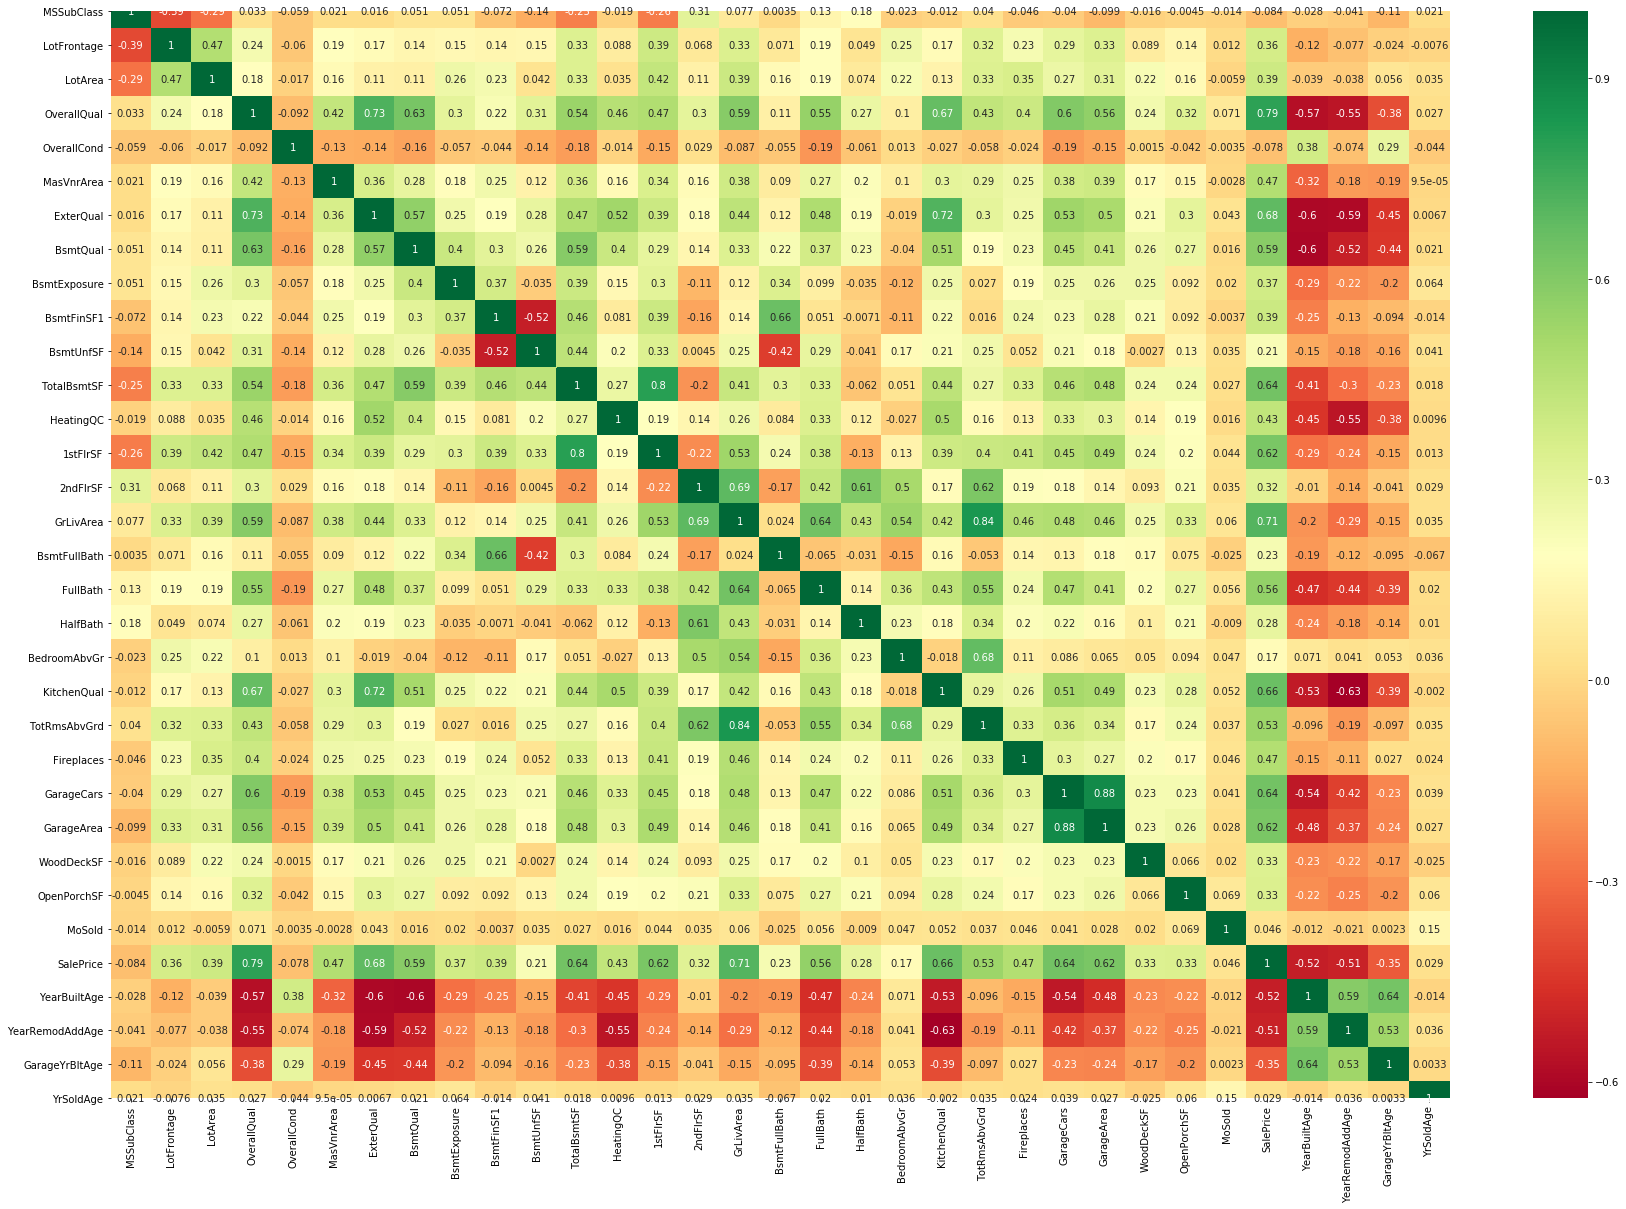

In [875]:
plt.figure(figsize  = (30,20))
sns.heatmap(applData.corr(), annot=True, cmap='RdYlGn')

## Generate dummy columns for categorical variables

In [876]:
columns = ['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'GarageType', 'GarageFinish']

applData = pd.get_dummies(data=applData, columns=columns, drop_first=True)
applData.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,YearBuiltAge,YearRemodAddAge,GarageYrBltAge,YrSoldAge,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,65.0,8450.0,7,5,196.0,4,4,1,706.0,150,856.0,5,856.0,854,1710.0,1,2,1,3,4,8,0,2,548,0.0,61.0,2,208500,17,17,17.0,12,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,20,80.0,9600.0,6,8,0.0,3,4,4,978.0,284,1262.0,5,1262.0,0,1262.0,0,2,0,3,3,6,1,2,460,298.0,0.0,5,181500,44,44,44.0,13,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,60,68.0,11250.0,7,5,162.0,4,4,2,486.0,434,920.0,5,920.0,866,1786.0,1,2,1,3,4,6,1,2,608,0.0,42.0,9,223500,19,18,19.0,12,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,70,60.0,9550.0,7,5,0.0,3,3,1,216.0,540,756.0,4,961.0,756,1717.0,1,1,0,3,4,7,1,3,642,0.0,35.0,2,140000,105,50,22.0,14,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,60,84.0,14260.0,8,5,350.0,4,4,3,655.0,490,1145.0,5,1145.0,1053,2198.0,1,2,1,4,4,9,1,3,836,192.0,84.0,12,250000,20,20,20.0,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


## Scale the Numerical variables

In [877]:
stdScaler = StandardScaler()

columns = ['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF',
           'TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF', 
           'MoSold','YearBuiltAge','YearRemodAddAge','GarageYrBltAge','YrSoldAge','OverallQual','OverallCond',
           'ExterQual','BsmtQual','BsmtExposure','HeatingQC','FullBath','BedroomAbvGr','KitchenQual','TotRmsAbvGrd',
           'BsmtFullBath','HalfBath','Fireplaces','GarageCars']
applData[columns] = stdScaler.fit_transform(applData[columns])
applData.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,YearBuiltAge,YearRemodAddAge,GarageYrBltAge,YrSoldAge,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,0.073375,-0.227830,-0.318740,0.651479,-0.517200,0.568901,1.052302,0.583168,-0.590555,0.623615,-0.944591,-0.481413,0.891179,-0.831214,1.161852,0.403472,1.107810,0.789741,1.227585,0.163779,0.735994,0.912210,-0.951226,0.311725,0.351000,-0.771337,0.244892,-1.599111,208500,-1.050994,-0.878668,-0.855220,-0.138777,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,-0.872563,0.538467,-0.091493,-0.071836,2.179628,-0.600080,-0.689604,0.583168,2.220999,1.257792,-0.641228,0.522918,0.891179,0.285158,-0.795163,-0.501616,-0.819964,0.789741,-0.761621,0.163779,-0.771091,-0.318683,0.600495,0.311725,-0.060731,1.696135,-0.739552,-0.489110,181500,-0.156734,0.429577,0.187906,0.614439,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0.073375,-0.074571,0.234557,0.651479,-0.517200,0.366119,1.052302,0.583168,0.346630,0.110677,-0.301643,-0.323095,0.891179,-0.655235,1.189351,0.557014,1.107810,0.789741,1.227585,0.163779,0.735994,-0.318683,0.600495,0.311725,0.631726,-0.771337,-0.061738,0.990891,223500,-0.984752,-0.830215,-0.777952,-0.138777,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0.309859,-0.483263,-0.101373,0.651479,-0.517200,-0.600080,-0.689604,-0.558153,-0.590555,-0.518837,-0.061670,-0.728785,-0.151386,-0.542497,0.937276,0.417614,1.107810,-1.026041,-0.761621,0.163779,0.735994,0.296763,0.600495,1.650307,0.790804,-0.771337,-0.174707,-1.599111,140000,1.863632,0.720298,-0.662049,1.367655,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0.073375,0.742813,0.829353,1.374795,-0.517200,1.487387,1.052302,0.583168,1.283814,0.504707,-0.174865,0.233493,0.891179,-0.036556,1.617877,1.389372,1.107810,0.789741,1.227585,1.390023,0.735994,1.527656,0.600495,1.650307,1.698485,0.818444,0.616075,2.100892,250000,-0.951632,-0.733308,-0.739317,-0.138777,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


# Divide the dataset in Train and Test Dataset

In [878]:
train_set, test_set = train_test_split(applData, train_size=0.7, random_state=100)

In [879]:
print(train_set.shape)
print(test_set.shape)

(1021, 92)
(439, 92)


In [880]:
# Divide the dataset in X_train and y_train
y_train = train_set.pop('SalePrice')
X_train = train_set

## Feature selection using RFE

In [881]:
linreg = LinearRegression()
rfe = RFE(linreg, n_features_to_select=25 )
rfe = rfe.fit(X_train, y_train)

In [882]:
#useful columns according to rfe
useful_cols = X_train.columns[rfe.support_]
useful_cols

Index(['MSSubClass', 'OverallQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'LotShape_IR3',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Other', 'Neighborhood_Somerst',
       'Exterior1st_Other', 'Exterior2nd_Other', 'Foundation_Stone',
       'BsmtFinType1_NA', 'BsmtFinType1_Rec', 'GarageType_CarPort'],
      dtype='object')

In [883]:
# Not useful columns according to rfe
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'ExterQual',
       'BsmtUnfSF', 'HeatingQC', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
       'YearBuiltAge', 'YearRemodAddAge', 'GarageYrBltAge', 'YrSoldAge',
       'LotShape_IR2', 'LotShape_Reg', 'LotConfig_Inside',
       'Neighborhood_CollgCr', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Timber', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'HouseStyle_Other', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd',
       'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'MasVnrType_BrkFace', 'MasVnrType_None', '

## Select only useful columns

In [884]:
X_train_rfe = X_train[useful_cols]
X_train_rfe.head()

,MSSubClass,OverallQual,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,LotShape_IR3,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Other,Neighborhood_Somerst,Exterior1st_Other,Exterior2nd_Other,Foundation_Stone,BsmtFinType1_NA,BsmtFinType1_Rec,GarageType_CarPort
318,0.073375,0.651479,0.583168,2.220999,1.278776,0.733184,0.587623,2.124318,2.294460,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
239,-0.163109,-0.071836,-0.558153,-0.590555,-0.803284,-0.780733,-0.990696,0.783740,-0.047052,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
986,-0.163109,-0.071836,-0.558153,-0.590555,-1.022448,-1.399163,-0.432510,0.657703,0.251951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1416,3.147673,-1.518467,-0.558153,-0.590555,-1.022448,-0.676837,0.241163,1.597253,1.575238,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
390,-0.163109,-0.795151,-0.558153,-0.590555,-0.460548,-0.469044,-0.542497,0.135221,-0.289486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


# Model Building and Evaluation

## Ridge Regression 
#### Hyperparameter tuning for Alpha value

In [885]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0 ]}

ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   30.0, 40.0, 50.0, 60.0, 70.0, 80.0, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [886]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005186,0.004388,0.001794,0.001163,0.0001,{'alpha': 0.0001},-20259.187600,-21932.950631,-22496.550185,-19879.070127,-16857.446344,-20285.015656,1974.899967,23,-19507.329027,-18652.480970,-19032.606027,-19409.079399,-19904.883710,-19301.275827,426.975464
1,0.003391,0.000488,0.001396,0.000488,0.001,{'alpha': 0.001},-20258.663199,-21932.905742,-22496.255328,-19878.617136,-16857.495512,-20284.761797,1974.829453,22,-19507.262585,-18652.374155,-19032.475563,-19409.019380,-19904.786052,-19301.183547,426.987290
2,0.002393,0.000489,0.001396,0.000488,0.01,{'alpha': 0.01},-20253.449549,-21932.458815,-22493.309208,-19874.119219,-16857.986703,-20282.236476,1974.125202,21,-19506.596573,-18651.354101,-19031.172592,-19408.416652,-19903.827065,-19300.273396,427.095479
3,0.003593,0.001356,0.001796,0.002223,0.05,{'alpha': 0.05},-20230.915153,-21930.515189,-22480.269573,-19854.798614,-16860.159037,-20271.291928,1971.014612,20,-19503.604031,-18647.045417,-19025.418038,-19405.685655,-19899.632703,-19296.277169,427.518206
4,0.002194,0.000977,0.001397,0.000489,0.1,{'alpha': 0.1},-20204.084189,-21928.181253,-22464.095338,-19832.506619,-16862.850105,-20258.290358,1967.150285,19,-19499.799470,-18642.070727,-19018.912996,-19402.166664,-19894.457338,-19291.481439,427.844688


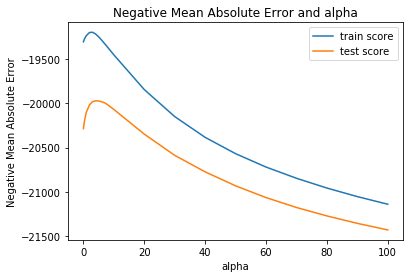

In [887]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [888]:
model_cv.best_estimator_

Ridge(alpha=4.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

## From the graph above Optimal Alpha value seems to be 4
- Train score is improving till alpha=4 and suddenly dropping bigger alpha values
- Test score is improving till alpha=4 and dropping for bigger values later
- So we will choose alpha=4 as optimal value

### Compute the accuracy score of Ridge Model using alpha=4

In [889]:
alpha = model_cv.best_estimator_.alpha
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([-10602.40225632,  21254.73604584,  10729.28961938,   8673.30803298,
        10221.51693502,   8367.25642003,  32111.80843633,  39819.70787389,
       -15228.53055136, -14449.94609376,   8800.39253   ,  -8338.42395951,
        -3626.50213104,  20114.98139476, -12432.68536557,  43011.53927662,
        45059.02285486,  11610.09376656,  26396.41983426,  10328.76458491,
        -9923.93760019,   6668.64510627,  57109.88439103, -10951.4159957 ,
       -11199.4208452 ])

## Most Important Features based on Ridge Regression

In [890]:
def score(y_pred, y_true):
    error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
    score = 1 - error
    return score

In [891]:
y_pred = ridge.predict(X_train_rfe)
print("Ridge Score: ", round(score(y_pred, y_train)*100, 2), "%")

Ridge Score:  93.06 %


In [892]:
ridgeCoefDF = pd.DataFrame()
ridgeCoefDF['Column'] = X_train_rfe.columns
ridgeCoefDF['Coef'] = ridge.coef_
ridgeCoefDF['Coef_Absolute'] = abs(ridgeCoefDF['Coef'])
ridgeCoefDF = ridgeCoefDF.sort_values(by = 'Coef_Absolute', ascending=False)
ridgeCoefDF.head(10)

,Column,Coef,Coef_Absolute
22,BsmtFinType1_NA,57109.884391,57109.884391
16,Neighborhood_NridgHt,45059.022855,45059.022855
15,Neighborhood_NoRidge,43011.539277,43011.539277
7,2ndFlrSF,39819.707874,39819.707874
6,1stFlrSF,32111.808436,32111.808436
18,Neighborhood_Somerst,26396.419834,26396.419834
1,OverallQual,21254.736046,21254.736046
13,Neighborhood_Crawfor,20114.981395,20114.981395
8,GrLivArea,-15228.530551,15228.530551
9,LotShape_IR3,-14449.946094,14449.946094


## Conclusion:
- Accuracy of the Ridge Model is 93.06%
- Above Top 10 feature are the deciding factor for House Sale Price

## Lasso Regression

In [893]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 
 70, 80, 90, 100, 200,300,400,500,600,700,800,1000 ]}

lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 80, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [894]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017752,0.004695,0.001397,0.000489,0.0001,{'alpha': 0.0001},-20259.244629,-21932.955517,-22496.582439,-19879.119263,-16857.441131,-20285.043303,1974.907638,34,-19507.336251,-18652.492561,-19032.620190,-19409.085910,-19904.894265,-19301.285835,426.974170
1,0.012764,0.002311,0.001396,0.000490,0.001,{'alpha': 0.001},-20259.233177,-21932.954583,-22496.577839,-19879.108163,-16857.443388,-20285.038131,1974.906157,33,-19507.334848,-18652.490044,-19032.617172,-19409.084518,-19904.891585,-19301.283633,426.974351
2,0.014065,0.005715,0.001397,0.000489,0.01,{'alpha': 0.01},-20259.118660,-21932.945233,-22496.531844,-19878.997162,-16857.465963,-20284.986412,1974.891338,32,-19507.320819,-18652.464880,-19032.586995,-19409.070592,-19904.864780,-19301.261613,426.976160
3,0.015167,0.003043,0.001396,0.000489,0.05,{'alpha': 0.05},-20258.609685,-21932.903685,-22496.327443,-19878.503821,-16857.566285,-20284.756550,1974.825504,31,-19507.258465,-18652.353041,-19032.452880,-19409.008694,-19904.745645,-19301.163745,426.984200
4,0.007779,0.000746,0.000599,0.000489,0.1,{'alpha': 0.1},-20257.973486,-21932.851728,-22496.071912,-19877.887145,-16857.691680,-20284.469214,1974.743243,30,-19507.180524,-18652.213222,-19032.285227,-19408.931320,-19904.596726,-19301.041404,426.994260


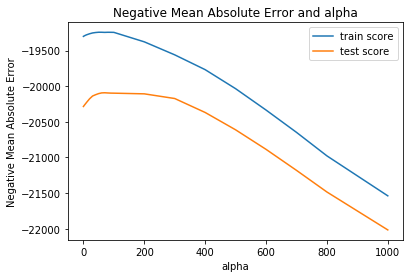

In [895]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [896]:
model_cv.best_estimator_

Lasso(alpha=70, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

## From Above alpha vs NMAE plot, it seems optimal alpha value is 70
- Train score is almost flat till alpha=70 and suddenly dropping bigger alpha values
- Test score is improving till alpha = 70 and suddenly dropping for bigger values later
- So we will choose alpha=70 as optimal value

### Compute the accuracy score of Lasso Model using alpha=70

In [897]:
alpha = model_cv.best_estimator_.alpha
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_rfe, y_train)
lasso.coef_

array([-10753.8766718 ,  20471.11315309,  11921.77795785,   8758.90604716,
         9894.90464418,   9405.54749774,  33677.2530214 ,  42790.95288866,
       -18610.65561152, -12502.36510381,   8087.89446926,  -7434.46220178,
           -0.        ,  21571.67044714, -12605.54557266,  46678.62923997,
        47135.67666019,  12008.15196941,  27245.27385345,   9275.83149679,
        -8869.49568768,      0.        ,  69571.27557177,  -9768.60636525,
        -7902.43508423])

In [898]:
y_pred = lasso.predict(X_train_rfe)
print("Lasso Score: ", round(score(y_pred, y_train)*100, 2), "%")

Lasso Score:  93.11 %


In [899]:
lassoCoefDF = pd.DataFrame()
lassoCoefDF['Column'] = X_train_rfe.columns
lassoCoefDF['Coef'] = lasso.coef_
lassoCoefDF['Coef_Abs'] = abs(lassoCoefDF['Coef'])
lassoCoefDF = lassoCoefDF.sort_values(by = 'Coef_Abs', ascending=False)
lassoCoefDF.head(10)

,Column,Coef,Coef_Abs
22,BsmtFinType1_NA,69571.275572,69571.275572
16,Neighborhood_NridgHt,47135.676660,47135.676660
15,Neighborhood_NoRidge,46678.629240,46678.629240
7,2ndFlrSF,42790.952889,42790.952889
6,1stFlrSF,33677.253021,33677.253021
18,Neighborhood_Somerst,27245.273853,27245.273853
13,Neighborhood_Crawfor,21571.670447,21571.670447
1,OverallQual,20471.113153,20471.113153
8,GrLivArea,-18610.655612,18610.655612
14,Neighborhood_Edwards,-12605.545573,12605.545573


## Conclusion:
- Accuracy of the Ridge Model is 93.11%
- Above Top 10 feature are the deciding factor for House Sale Price

# Test the Accuracy score on the Test Data

In [900]:
y_test = test_set.pop('SalePrice')
X_test = test_set[X_train_rfe.columns]

In [901]:
y_pred_test_ridge = ridge.predict(X_test)
print("Ridge Score: ", round(score(y_pred_test_ridge, y_test)*100, 2), "%")

Ridge Score:  91.83 %


In [902]:
y_pred_test_lasso = lasso.predict(X_test)
print("Lasso Score: ", round(score(y_pred_test_lasso, y_test)*100, 2), "%")

Lasso Score:  92.19 %


# Final Conclusion

### Best Alpha Value for Ridge Regression is 4

### Accuracy Score
- Train Data Accuracy Score: 93.06 %
- Test Data Accuracy Score: 91.83

### Features which are the deciding factor for House Sale price are
- BsmtFinType1 (No Basement)
- Neighborhood (North Ridge)
- Neighborhood (Northridge Heights)
- 2ndFlrSF
- 1stFlrSF
- Neighborhood (Somerset)
- OverallQual
- Neighborhood_Crawfor
- GrLivArea
- LotShape_IR3

### Best Alpha Value for Lasso Regression is 70

### Accuracy Score
- Train Data Accuracy Score: 93.11 %
- Test Data Accuracy Score: 92.19 %

### Features which are the deciding factor for House Sale price are
- BsmtFinType1 (No Basement)
- Neighborhood (Northridge Heights)
- Neighborhood (North Ridge)
- 2ndFlrSF
- 1stFlrSF
- Neighborhood_Somerst
- Neighborhood_Crawfor
- OverallQual
- GrLivArea
- Neighborhood_Edwards

# If Double the value of Alpha for Ridge Regression (from 4 to 8)

In [903]:
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([-10258.31892404,  22375.54296198,   9735.61838832,   8540.12642361,
        10403.2797551 ,   7429.74797094,  28217.76764765,  33944.84561695,
        -8514.86356555, -11374.72230715,   8635.88060731,  -6969.6193861 ,
        -2152.60060047,  16658.70836101, -11299.69401411,  37897.51382571,
        40856.6395713 ,   9915.34408485,  23847.54873071,   8608.10809806,
        -7886.47983395,   3572.10153979,  46140.63390507, -10875.12541216,
        -7951.70689494])

In [904]:
y_pred = ridge.predict(X_train_rfe)
print("Ridge Score: ", round(score(y_pred, y_train)*100, 2), "%")

Ridge Score:  92.95 %


In [905]:
ridgeCoefDF = pd.DataFrame()
ridgeCoefDF['Column'] = X_train_rfe.columns
ridgeCoefDF['Coef'] = ridge.coef_
ridgeCoefDF['Coef_Absolute'] = abs(ridgeCoefDF['Coef'])
ridgeCoefDF = ridgeCoefDF.sort_values(by = 'Coef_Absolute', ascending=False)
ridgeCoefDF.head(10)

,Column,Coef,Coef_Absolute
22,BsmtFinType1_NA,46140.633905,46140.633905
16,Neighborhood_NridgHt,40856.639571,40856.639571
15,Neighborhood_NoRidge,37897.513826,37897.513826
7,2ndFlrSF,33944.845617,33944.845617
6,1stFlrSF,28217.767648,28217.767648
18,Neighborhood_Somerst,23847.548731,23847.548731
1,OverallQual,22375.542962,22375.542962
13,Neighborhood_Crawfor,16658.708361,16658.708361
9,LotShape_IR3,-11374.722307,11374.722307
14,Neighborhood_Edwards,-11299.694014,11299.694014


# If Double the value of Alpha for Lasso Regression (from 70 to 140)

In [906]:
alpha = 140
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_rfe, y_train)
lasso.coef_

array([-10471.39008955,  21389.93715038,  11335.30762183,   8672.94056596,
         9926.94608526,   8648.1574163 ,  28944.14665393,  36098.13350805,
       -11022.20883165,  -4659.18506365,   7400.25586841,  -4487.74021179,
           -0.        ,  18059.43625849, -11022.18877539,  43974.8214549 ,
        44399.47243997,  10231.35261678,  25276.89374078,   5385.1570748 ,
        -4797.63466735,      0.        ,  63255.87413178,  -8747.92095158,
           -0.        ])

In [907]:
y_pred = lasso.predict(X_train_rfe)
print("Lasso Score: ", round(score(y_pred, y_train)*100, 2), "%")

Lasso Score:  93.1 %


In [908]:
lassoCoefDF = pd.DataFrame()
lassoCoefDF['Column'] = X_train_rfe.columns
lassoCoefDF['Coef'] = lasso.coef_
lassoCoefDF['Coef_Abs'] = abs(lassoCoefDF['Coef'])
lassoCoefDF = lassoCoefDF.sort_values(by = 'Coef_Abs', ascending=False)
lassoCoefDF.head(10)

,Column,Coef,Coef_Abs
22,BsmtFinType1_NA,63255.874132,63255.874132
16,Neighborhood_NridgHt,44399.472440,44399.472440
15,Neighborhood_NoRidge,43974.821455,43974.821455
7,2ndFlrSF,36098.133508,36098.133508
6,1stFlrSF,28944.146654,28944.146654
18,Neighborhood_Somerst,25276.893741,25276.893741
1,OverallQual,21389.937150,21389.937150
13,Neighborhood_Crawfor,18059.436258,18059.436258
2,BsmtQual,11335.307622,11335.307622
8,GrLivArea,-11022.208832,11022.208832


# If we remove the top 5 most important variable from the feature set

In [909]:
X_train_rfe.drop(columns = ['BsmtFinType1_NA', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', '2ndFlrSF', '1stFlrSF'], inplace=True)

alpha = 70
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_rfe, y_train)
lasso.coef_

array([ -8911.69048015,  30098.64062324,   3784.10744765,   7966.0723441 ,
        12371.53073603,   7656.13625834,  31029.31928223, -20715.43505925,
         9370.85729402,  -3446.32454928,     -0.        ,   9456.58136682,
        -7740.92562214,   1774.54031346,  16669.36289393,   4738.93353286,
        -2570.9631022 ,      0.        , -14715.89276304,  -1062.55966049])

In [910]:
y_pred = lasso.predict(X_train_rfe)
print("Lasso Score: ", round(score(y_pred, y_train)*100, 2), "%")

Lasso Score:  90.03 %


In [911]:
lassoCoefDF = pd.DataFrame()
lassoCoefDF['Column'] = X_train_rfe.columns
lassoCoefDF['Coef'] = lasso.coef_
lassoCoefDF['Coef_Abs'] = abs(lassoCoefDF['Coef'])
lassoCoefDF = lassoCoefDF.sort_values(by = 'Coef_Abs', ascending=False)
lassoCoefDF.head(10)

,Column,Coef,Coef_Abs
6,GrLivArea,31029.319282,31029.319282
1,OverallQual,30098.640623,30098.640623
7,LotShape_IR3,-20715.435059,20715.435059
14,Neighborhood_Somerst,16669.362894,16669.362894
18,BsmtFinType1_Rec,-14715.892763,14715.892763
4,BsmtFinSF1,12371.530736,12371.530736
11,Neighborhood_Crawfor,9456.581367,9456.581367
8,LotConfig_CulDSac,9370.857294,9370.857294
0,MSSubClass,-8911.690480,8911.690480
3,BsmtExposure,7966.072344,7966.072344
